<a href="https://colab.research.google.com/github/Simalg/Simalg/blob/main/irisKumeleme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Silhouette Score: 0.5528190123564095
Hierarchical Silhouette Score: 0.5543236611296419
DBSCAN Silhouette Score: 0.48603419703456857


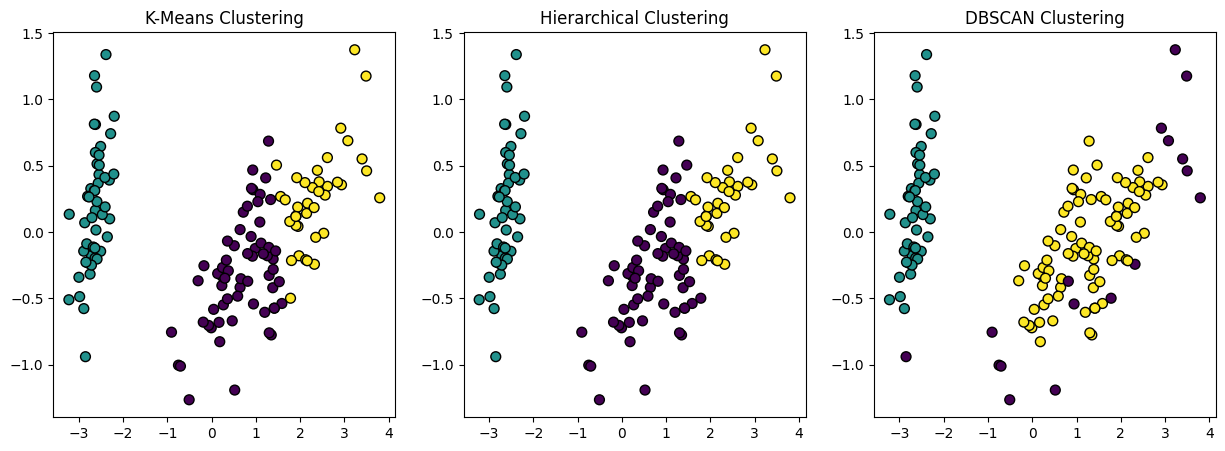

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Iris veri setini yükleyelim
iris = load_iris()
X = iris.data
y = iris.target

# Kümeleme modellerini oluşturalım
# 1. K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# 2. Hierarchical Clustering (Agglomerative)
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X)

# 3. DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Kümeleme performanslarını değerlendirelim
silhouette_kmeans = silhouette_score(X, kmeans_labels)
silhouette_hierarchical = silhouette_score(X, hierarchical_labels)
silhouette_dbscan = silhouette_score(X, dbscan_labels)

print("K-Means Silhouette Score:", silhouette_kmeans)
print("Hierarchical Silhouette Score:", silhouette_hierarchical)
print("DBSCAN Silhouette Score:", silhouette_dbscan)

# Kümeleme sonuçlarını görselleştirelim
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k', s=50)
plt.title('K-Means Clustering')

plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='viridis', edgecolors='k', s=50)
plt.title('Hierarchical Clustering')

plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', edgecolors='k', s=50)
plt.title('DBSCAN Clustering')

plt.show()
